In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\User\Documents\juputer\drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
df.shape

(200, 6)

In [4]:
df.keys()

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [5]:
df_selected = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
print(df_selected.head())

   Age Sex      BP Cholesterol  Na_to_K
0   23   F    HIGH        HIGH   25.355
1   47   M     LOW        HIGH   13.093
2   47   M     LOW        HIGH   10.114
3   28   F  NORMAL        HIGH    7.798
4   61   F     LOW        HIGH   18.043


In [6]:
X = df.drop(columns=['Drug'])
y = df['Drug']
print(X.head())

   Age Sex      BP Cholesterol  Na_to_K
0   23   F    HIGH        HIGH   25.355
1   47   M     LOW        HIGH   13.093
2   47   M     LOW        HIGH   10.114
3   28   F  NORMAL        HIGH    7.798
4   61   F     LOW        HIGH   18.043


In [7]:
print(y.head()) 

0    DrugY
1    drugC
2    drugC
3    drugX
4    DrugY
Name: Drug, dtype: object


In [8]:
kolom_array = np.array(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'])
print(kolom_array)

['Age' 'Sex' 'BP' 'Cholesterol' 'Na_to_K']


In [9]:
array_fitur = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
print(array_fitur)

[[23 'F' 'HIGH' 'HIGH' 25.355]
 [47 'M' 'LOW' 'HIGH' 13.093]
 [47 'M' 'LOW' 'HIGH' 10.114]
 [28 'F' 'NORMAL' 'HIGH' 7.798]
 [61 'F' 'LOW' 'HIGH' 18.043]
 [22 'F' 'NORMAL' 'HIGH' 8.607]
 [49 'F' 'NORMAL' 'HIGH' 16.275]
 [41 'M' 'LOW' 'HIGH' 11.037]
 [60 'M' 'NORMAL' 'HIGH' 15.171]
 [43 'M' 'LOW' 'NORMAL' 19.368]
 [47 'F' 'LOW' 'HIGH' 11.767]
 [34 'F' 'HIGH' 'NORMAL' 19.199]
 [43 'M' 'LOW' 'HIGH' 15.376]
 [74 'F' 'LOW' 'HIGH' 20.942]
 [50 'F' 'NORMAL' 'HIGH' 12.703]
 [16 'F' 'HIGH' 'NORMAL' 15.516]
 [69 'M' 'LOW' 'NORMAL' 11.455]
 [43 'M' 'HIGH' 'HIGH' 13.972]
 [23 'M' 'LOW' 'HIGH' 7.298]
 [32 'F' 'HIGH' 'NORMAL' 25.974]
 [57 'M' 'LOW' 'NORMAL' 19.128]
 [63 'M' 'NORMAL' 'HIGH' 25.917]
 [47 'M' 'LOW' 'NORMAL' 30.568]
 [48 'F' 'LOW' 'HIGH' 15.036]
 [33 'F' 'LOW' 'HIGH' 33.486]
 [28 'F' 'HIGH' 'NORMAL' 18.809]
 [31 'M' 'HIGH' 'HIGH' 30.366]
 [49 'F' 'NORMAL' 'NORMAL' 9.381]
 [39 'F' 'LOW' 'NORMAL' 22.697]
 [45 'M' 'LOW' 'HIGH' 17.951]
 [18 'F' 'NORMAL' 'NORMAL' 8.75]
 [74 'M' 'HIGH' 'HIGH' 

In [10]:
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':  
        df[column] = label_encoder.fit_transform(df[column])

In [11]:
array_fitur = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
print(array_fitur)

[[23.     0.     0.     0.    25.355]
 [47.     1.     1.     0.    13.093]
 [47.     1.     1.     0.    10.114]
 [28.     0.     2.     0.     7.798]
 [61.     0.     1.     0.    18.043]
 [22.     0.     2.     0.     8.607]
 [49.     0.     2.     0.    16.275]
 [41.     1.     1.     0.    11.037]
 [60.     1.     2.     0.    15.171]
 [43.     1.     1.     1.    19.368]
 [47.     0.     1.     0.    11.767]
 [34.     0.     0.     1.    19.199]
 [43.     1.     1.     0.    15.376]
 [74.     0.     1.     0.    20.942]
 [50.     0.     2.     0.    12.703]
 [16.     0.     0.     1.    15.516]
 [69.     1.     1.     1.    11.455]
 [43.     1.     0.     0.    13.972]
 [23.     1.     1.     0.     7.298]
 [32.     0.     0.     1.    25.974]
 [57.     1.     1.     1.    19.128]
 [63.     1.     2.     0.    25.917]
 [47.     1.     1.     1.    30.568]
 [48.     0.     1.     0.    15.036]
 [33.     0.     1.     0.    33.486]
 [28.     0.     0.     1.    18.809]
 [31.     1.

In [12]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [13]:
import seaborn as sns

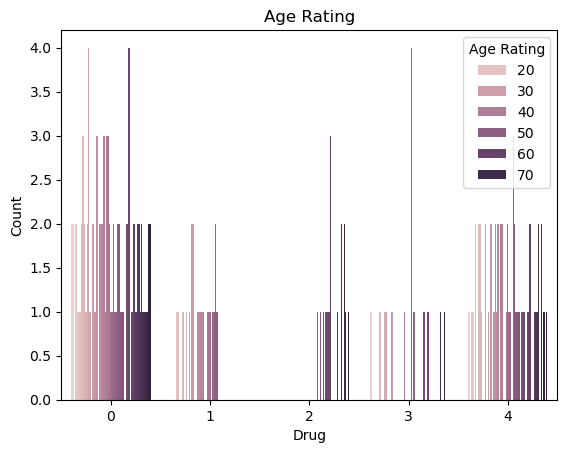

In [14]:
sns.countplot(x='Drug', hue='Age', data=df)
plt.title('Age Rating')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.legend(title='Age Rating')
plt.show()

#### 0 = ObatA
#### 1 = ObatB
#### 2 = ObatC
#### 3 = ObatX
#### 4 = ObatY

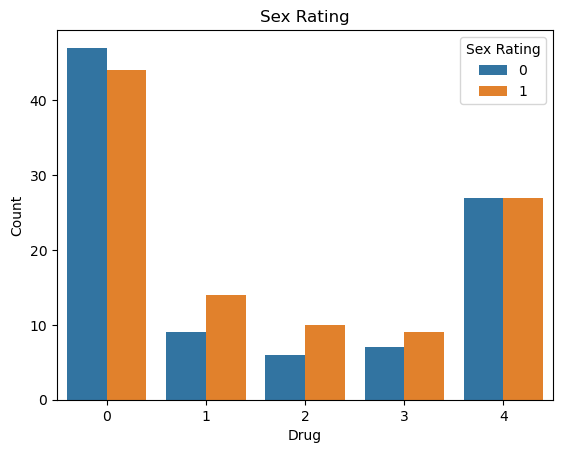

In [15]:
sns.countplot(x='Drug', hue='Sex', data=df)
plt.title('Sex Rating')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.legend(title='Sex Rating')
plt.show()

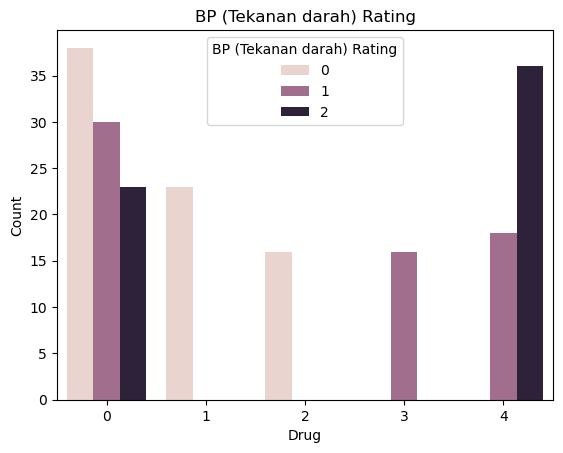

In [16]:
sns.countplot(x='Drug', hue='BP', data=df)
plt.title('BP (Tekanan darah) Rating')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.legend(title='BP (Tekanan darah) Rating')
plt.show()

##### 0 = Low
##### 1 = Normal
##### 2 = High

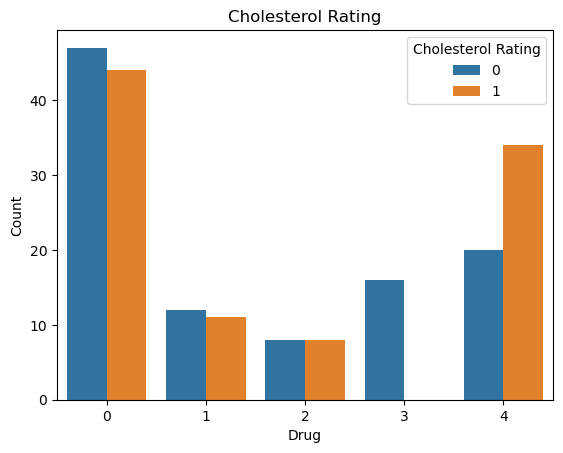

In [17]:
sns.countplot(x='Drug', hue='Cholesterol', data=df)
plt.title('Cholesterol Rating')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.legend(title='Cholesterol Rating')
plt.show()

#### 0 = High
#### 1 = Normal

In [18]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [20]:
classifier = SVC(C = 10.0, kernel = "linear",decision_function_shape='ovr')
classifier.fit(X_train, y_train)

SVC(C=10.0, kernel='linear')

In [21]:
y_pred = classifier.predict(X_test)

In [22]:
acc_train = accuracy_score(y_train, classifier.predict(X_train))

acc_test = accuracy_score(y_test, classifier.predict(X_test))

f1_train = f1_score(y_train, classifier.predict(X_train), average= 'weighted')



print("Traing set results")

print("ACCURACY for train set",acc_train)

print("ACCURACY for test set",acc_test)

print("F1 SCORE for train set",f1_train)

Traing set results
ACCURACY for train set 1.0
ACCURACY for test set 1.0
F1 SCORE for train set 1.0
